# Introduction
In this project I will analyze which is the best hypothesis for boosting the revenue.
## Outlines
1. I will prioritize hypotheses.
2. Conduct an A/B test.
3. Make decision based on it.
### Tasks
I will check the data integrity, examine the hypothesis,divide the users by their group and calculate which is better for business.

## Table of contents:
1. Unfolding of the data 
2. Prioritizing Hypotheses 
3. Conclusions and recommendations 
4. A/B test analysis 
5. conclusions and recommendations

In [1]:
pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U plotly

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 27.7 MB 4.5 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U sidetable

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 3.3 MB/s eta 0:00:01    |██████████████████████████▍     | 9.3 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import math
import random
import datetime as dt
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')
hypotheses.columns = hypotheses.columns.str.lower()
pd.set_option("display.max_colwidth", -1)
hypotheses

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


hypothesis  \
0  Add two new channels for attracting traffic. This will bring 30% more users                                              
1  Launch your own delivery service. This will shorten delivery time                                                        
2  Add product recommendation blocks to the store's site. This will increase conversion and average purchase size           
3  Change the category structure. This will increase conversion since users will find the products they want more quickly   
4  Change the background color on the main page. This will increase user engagement                                         
5  Add a customer review page. This will increase the number of orders                                                      
6  Show banners with current offers and sales on the main page. This will boost conversion                                  
7  Add a subscription form to all the main pages. This will help you compile a mailing list                                 
8  Launch a promotion that gives users discounts on their birthdays                                                         

   reach  impact  confidence  effort  
0  3      10      8           6       
1  2      5       4           10      
2  8      3       7           3       
3  8      3       3           8       
4  3      1       1           1       
5  3      2       2           3       
6  5      3       8           3       
7  10     7       8           5       
8  1      9       9           5

There are 9 hypothesis with different marks on 4 assessing parameters.

In [6]:
data = [['hypothesis_1', 3, 10, 8, 6], ['hypothesis_2', 2, 5, 4, 10], ['hypothesis_3', 8, 3, 7, 3], ['hypothesis_4', 8, 3, 3, 8], ['hypothesis_5', 3, 1, 1, 1], ['hypothesis_6', 3, 2, 2, 3], ['hypothesis_7', 5, 3, 8, 3], ['hypothesis_8', 10, 7, 8, 5], ['hypothesis_9', 1, 9, 9, 5]]
hypotheses = pd.DataFrame(data, columns = ['hypothesis', 'reach', 'impact', 'confidence', 'effort'])
hypotheses

hypothesis  reach  impact  confidence  effort
0  hypothesis_1  3      10      8           6     
1  hypothesis_2  2      5       4           10    
2  hypothesis_3  8      3       7           3     
3  hypothesis_4  8      3       3           8     
4  hypothesis_5  3      1       1           1     
5  hypothesis_6  3      2       2           3     
6  hypothesis_7  5      3       8           3     
7  hypothesis_8  10     7       8           5     
8  hypothesis_9  1      9       9           5

In [7]:
hypotheses.stb.missing(style = True)

In [8]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.head()

transactionId   visitorId        date  revenue group
0  3667963787     3312258926  2019-08-15  30.4     B   
1  2804400009     3642806036  2019-08-15  15.2     B   
2  2961555356     4069496402  2019-08-15  10.2     A   
3  3797467345     1196621759  2019-08-15  155.1    B   
4  2282983706     2322279887  2019-08-15  40.5     B

In [9]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits.head()

date group  visits
0  2019-08-01  A     719   
1  2019-08-02  A     619   
2  2019-08-03  A     507   
3  2019-08-04  A     717   
4  2019-08-05  A     756

In [10]:
visits.drop_duplicates().reset_index()

index        date group  visits
0   0      2019-08-01  A     719   
1   1      2019-08-02  A     619   
2   2      2019-08-03  A     507   
3   3      2019-08-04  A     717   
4   4      2019-08-05  A     756   
.. ..             ... ..     ...   
57  57     2019-08-27  B     720   
58  58     2019-08-28  B     654   
59  59     2019-08-29  B     531   
60  60     2019-08-30  B     490   
61  61     2019-08-31  B     718   

[62 rows x 4 columns]

In [11]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
orders.drop_duplicates().reset_index()

index  transactionId   visitorId        date  revenue group
0     0      3667963787     3312258926  2019-08-15  30.4     B   
1     1      2804400009     3642806036  2019-08-15  15.2     B   
2     2      2961555356     4069496402  2019-08-15  10.2     A   
3     3      3797467345     1196621759  2019-08-15  155.1    B   
4     4      2282983706     2322279887  2019-08-15  40.5     B   
...  ..             ...            ...         ...   ...    ..   
1192  1192   2662137336     3733762160  2019-08-14  100.8    B   
1193  1193   2203539145     370388673   2019-08-14  50.1     A   
1194  1194   1807773912     573423106   2019-08-14  165.3    A   
1195  1195   1947021204     1614305549  2019-08-14  5.5      A   
1196  1196   3936777065     2108080724  2019-08-15  3120.1   B   

[1197 rows x 6 columns]

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


All the data seems intact & in the appropriate type.

In [14]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
print(hypotheses[['hypothesis', 'ICE']].sort_values(['ICE'], ascending = False))

     hypothesis        ICE
8  hypothesis_9  16.200000
0  hypothesis_1  13.333333
7  hypothesis_8  11.200000
6  hypothesis_7  8.000000 
2  hypothesis_3  7.000000 
1  hypothesis_2  2.000000 
5  hypothesis_6  1.333333 
3  hypothesis_4  1.125000 
4  hypothesis_5  1.000000 


As I can see hypothesis 9 is the most profitable one considering all the variants, 1 & 8 are also quit good. 2, 6, 4 & 5 are terrible.

In [15]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']
print(hypotheses[['hypothesis', 'RICE']].sort_values(['RICE'], ascending = False))

     hypothesis   RICE
7  hypothesis_8  112.0
2  hypothesis_3  56.0 
0  hypothesis_1  40.0 
6  hypothesis_7  40.0 
8  hypothesis_9  16.2 
3  hypothesis_4  9.0  
1  hypothesis_2  4.0  
5  hypothesis_6  4.0  
4  hypothesis_5  3.0  


Here hypothesis 8 is leading by a long shot, falling behind are 3, 1 & 7.The 'worst' are 9, 4, 2 & 3 

### It seems that the leading hypothesis 9 in the ICE framework id one of the worst in the RICE framework and so with different hypothesis, perhaps the best way is to use several frameworks combined and with the average we can look into which one is the most profitable hypothesis.
### The RICE framework takes into account the Reach parameter, something that the ICE framework is missing and therefore less accurate.

### In this part of the project I will conduct an A/B test from the data in orders_us.csv & visits_us.csv dataframes.

In [16]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
list_users = list(orders.groupby(['visitorId'])['group'].nunique().reset_index().query('group > 1')['visitorId'])
orders = orders[~orders['visitorId'].isin(['list_users'])]

In [18]:
visitsA = visits.query('group == "A"').reset_index()
visitsA

index       date group  visits
0   0     2019-08-01  A     719   
1   1     2019-08-02  A     619   
2   2     2019-08-03  A     507   
3   3     2019-08-04  A     717   
4   4     2019-08-05  A     756   
5   5     2019-08-06  A     667   
6   6     2019-08-07  A     644   
7   7     2019-08-08  A     610   
8   8     2019-08-09  A     617   
9   9     2019-08-10  A     406   
10  10    2019-08-11  A     718   
11  11    2019-08-12  A     595   
12  12    2019-08-13  A     748   
13  13    2019-08-14  A     735   
14  14    2019-08-15  A     628   
15  15    2019-08-16  A     361   
16  16    2019-08-17  A     412   
17  17    2019-08-18  A     668   
18  18    2019-08-19  A     502   
19  19    2019-08-20  A     575   
20  20    2019-08-21  A     646   
21  21    2019-08-22  A     609   
22  22    2019-08-23  A     468   
23  23    2019-08-24  A     395   
24  24    2019-08-25  A     621   
25  25    2019-08-26  A     722   
26  26    2019-08-27  A     711   
27  27    2019-08-28  A     594   
28  28    2019-08-29  A     577   
29  29    2019-08-30  A     490   
30  30    2019-08-31  A     699

In [19]:
visitsB = visits.query('group == "B"').reset_index()
visitsB

index       date group  visits
0   31    2019-08-01  B     713   
1   32    2019-08-02  B     581   
2   33    2019-08-03  B     509   
3   34    2019-08-04  B     770   
4   35    2019-08-05  B     707   
5   36    2019-08-06  B     655   
6   37    2019-08-07  B     709   
7   38    2019-08-08  B     654   
8   39    2019-08-09  B     610   
9   40    2019-08-10  B     369   
10  41    2019-08-11  B     721   
11  42    2019-08-12  B     543   
12  43    2019-08-13  B     769   
13  44    2019-08-14  B     746   
14  45    2019-08-15  B     544   
15  46    2019-08-16  B     413   
16  47    2019-08-17  B     421   
17  48    2019-08-18  B     737   
18  49    2019-08-19  B     487   
19  50    2019-08-20  B     560   
20  51    2019-08-21  B     656   
21  52    2019-08-22  B     650   
22  53    2019-08-23  B     546   
23  54    2019-08-24  B     378   
24  55    2019-08-25  B     679   
25  56    2019-08-26  B     676   
26  57    2019-08-27  B     720   
27  58    2019-08-28  B     654   
28  59    2019-08-29  B     531   
29  60    2019-08-30  B     490   
30  61    2019-08-31  B     718

In [20]:
ordersA = orders.query('group == "A"')
ordersA

transactionId   visitorId       date  revenue group
2     2961555356     4069496402 2019-08-15  10.2     A   
7     2626614568     78758296   2019-08-15  20.1     A   
8     1576988021     295230930  2019-08-15  215.9    A   
10    3649131742     879864040  2019-08-15  65.7     A   
12    2809384911     3213223594 2019-08-15  115.4    A   
...          ...            ...        ...    ...   ..   
1187  2274188238     132143192  2019-08-14  15.5     A   
1188  1692103379     1022829655 2019-08-14  5.7      A   
1193  2203539145     370388673  2019-08-14  50.1     A   
1194  1807773912     573423106  2019-08-14  165.3    A   
1195  1947021204     1614305549 2019-08-14  5.5      A   

[557 rows x 5 columns]

In [21]:
ordersB = orders.query('group == "B"')
ordersB

transactionId   visitorId       date  revenue group
0     3667963787     3312258926 2019-08-15  30.4     B   
1     2804400009     3642806036 2019-08-15  15.2     B   
3     3797467345     1196621759 2019-08-15  155.1    B   
4     2282983706     2322279887 2019-08-15  40.5     B   
5     182168103      935554773  2019-08-15  35.0     B   
...         ...            ...         ...   ...    ..   
1189  4082620617     393266494  2019-08-14  490.4    B   
1190  38478481       1197745035 2019-08-14  135.3    B   
1191  3592955527     608641596  2019-08-14  255.7    B   
1192  2662137336     3733762160 2019-08-14  100.8    B   
1196  3936777065     2108080724 2019-08-15  3120.1   B   

[640 rows x 5 columns]

In [22]:
ordersA = ordersA.groupby('date').agg({'revenue' : 'sum', 'transactionId' : 'nunique', 'visitorId' : 'nunique'}).reset_index()
ordersB = ordersB.groupby('date').agg({'revenue' : 'sum', 'transactionId' : 'nunique', 'visitorId' : 'nunique'}).reset_index()
ordersA

date  revenue  transactionId  visitorId
0  2019-08-01  2356.8   24             20       
1  2019-08-02  1503.5   20             19       
2  2019-08-03  1815.2   24             24       
3  2019-08-04  1146.6   16             15       
4  2019-08-05  1988.1   25             25       
5  2019-08-06  789.8    18             15       
6  2019-08-07  2242.9   18             18       
7  2019-08-08  1530.4   16             16       
8  2019-08-09  2947.1   16             14       
9  2019-08-10  3288.2   16             16       
10 2019-08-11  1229.7   13             13       
11 2019-08-12  3910.8   24             24       
12 2019-08-13  4096.9   14             14       
13 2019-08-14  1064.8   24             24       
14 2019-08-15  1408.2   15             15       
15 2019-08-16  1599.1   18             18       
16 2019-08-17  805.5    10             9        
17 2019-08-18  1171.8   17             17       
18 2019-08-19  2989.1   22             22       
19 2019-08-20  1232.3   12             12       
20 2019-08-21  2755.5   23             22       
21 2019-08-22  1783.3   16             16       
22 2019-08-23  1888.0   25             25       
23 2019-08-24  2002.7   15             15       
24 2019-08-25  1078.9   10             10       
25 2019-08-26  2464.8   16             16       
26 2019-08-27  4511.1   28             28       
27 2019-08-28  1602.6   17             17       
28 2019-08-29  4995.5   22             22       
29 2019-08-30  1364.3   11             10       
30 2019-08-31  991.4    12             12

In [23]:
ordersA['cumrev'] = ordersA['revenue'].cumsum()
ordersB['cumrev'] = ordersB['revenue'].cumsum()

In [24]:
plt.rcParams["figure.figsize"] = (15, 6)
plt.plot(ordersA['date'], ordersA['cumrev'], label = 'A')
plt.plot(ordersB['date'], ordersB['cumrev'], label = 'B')
plt.suptitle('Cumulative Revenue')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

The cumulative revenue groped shows similarity untill approximately 19.8.2019 that's when group B started consistently generate more revenue. There was a huge leap of 20,000 in a matter of a day.

In [25]:
ordersA['cumpur'] = visitsA['visits'].cumsum()
ordersA['cumavg'] = ordersA['cumrev'] / ordersA['cumpur']
ordersA

date  revenue  transactionId  visitorId   cumrev  cumpur    cumavg
0  2019-08-01  2356.8   24             20         2356.8   719     3.277886
1  2019-08-02  1503.5   20             19         3860.3   1338    2.885127
2  2019-08-03  1815.2   24             24         5675.5   1845    3.076152
3  2019-08-04  1146.6   16             15         6822.1   2562    2.662802
4  2019-08-05  1988.1   25             25         8810.2   3318    2.655274
5  2019-08-06  789.8    18             15         9600.0   3985    2.409034
6  2019-08-07  2242.9   18             18         11842.9  4629    2.558414
7  2019-08-08  1530.4   16             16         13373.3  5239    2.552644
8  2019-08-09  2947.1   16             14         16320.4  5856    2.786954
9  2019-08-10  3288.2   16             16         19608.6  6262    3.131364
10 2019-08-11  1229.7   13             13         20838.3  6980    2.985430
11 2019-08-12  3910.8   24             24         24749.1  7575    3.267208
12 2019-08-13  4096.9   14             14         28846.0  8323    3.465818
13 2019-08-14  1064.8   24             24         29910.8  9058    3.302142
14 2019-08-15  1408.2   15             15         31319.0  9686    3.233430
15 2019-08-16  1599.1   18             18         32918.1  10047   3.276411
16 2019-08-17  805.5    10             9          33723.6  10459   3.224362
17 2019-08-18  1171.8   17             17         34895.4  11127   3.136101
18 2019-08-19  2989.1   22             22         37884.5  11629   3.257761
19 2019-08-20  1232.3   12             12         39116.8  12204   3.205244
20 2019-08-21  2755.5   23             22         41872.3  12850   3.258545
21 2019-08-22  1783.3   16             16         43655.6  13459   3.243599
22 2019-08-23  1888.0   25             25         45543.6  13927   3.270166
23 2019-08-24  2002.7   15             15         47546.3  14322   3.319809
24 2019-08-25  1078.9   10             10         48625.2  14943   3.254045
25 2019-08-26  2464.8   16             16         51090.0  15665   3.261411
26 2019-08-27  4511.1   28             28         55601.1  16376   3.395280
27 2019-08-28  1602.6   17             17         57203.7  16970   3.370872
28 2019-08-29  4995.5   22             22         62199.2  17547   3.544720
29 2019-08-30  1364.3   11             10         63563.5  18037   3.524062
30 2019-08-31  991.4    12             12         64554.9  18736   3.445501

In [26]:
ordersB['cumpur'] = visitsB['visits'].cumsum()
ordersB['cumavg'] = ordersB['cumrev'] / ordersB['cumpur']
ordersB

date  revenue  transactionId  visitorId   cumrev  cumpur    cumavg
0  2019-08-01  1620.0   21             20         1620.0   713     2.272090
1  2019-08-02  2623.8   24             23         4243.8   1294    3.279598
2  2019-08-03  1806.8   16             16         6050.6   1803    3.355851
3  2019-08-04  1717.3   17             16         7767.9   2573    3.019005
4  2019-08-05  1495.0   23             23         9262.9   3280    2.824055
5  2019-08-06  3806.4   28             26         13069.3  3935    3.321296
6  2019-08-07  3531.5   24             24         16600.8  4644    3.574677
7  2019-08-08  3487.8   27             27         20088.6  5298    3.791733
8  2019-08-09  2558.1   25             24         22646.7  5908    3.833226
9  2019-08-10  1720.4   23             23         24367.1  6277    3.881966
10 2019-08-11  861.2    13             13         25228.3  6998    3.605073
11 2019-08-12  2245.7   23             22         27474.0  7541    3.643283
12 2019-08-13  1910.0   21             21         29384.0  8310    3.535981
13 2019-08-14  2711.7   23             22         32095.7  9056    3.544136
14 2019-08-15  5361.9   31             31         37457.6  9600    3.901833
15 2019-08-16  2697.7   20             20         40155.3  10013   4.010317
16 2019-08-17  1281.5   14             14         41436.8  10434   3.971325
17 2019-08-18  1044.9   9              9          42481.7  11171   3.802856
18 2019-08-19  22064.9  21             20         64546.6  11658   5.536679
19 2019-08-20  2324.6   20             20         66871.2  12218   5.473171
20 2019-08-21  2555.9   14             14         69427.1  12874   5.392815
21 2019-08-22  2560.8   25             24         71987.9  13524   5.322974
22 2019-08-23  1799.5   15             15         73787.4  14070   5.244307
23 2019-08-24  1527.2   16             16         75314.6  14448   5.212805
24 2019-08-25  1626.5   14             14         76941.1  15127   5.086342
25 2019-08-26  2900.4   25             24         79841.5  15803   5.052300
26 2019-08-27  2319.8   16             16         82161.3  16523   4.972541
27 2019-08-28  1558.0   28             27         83719.3  17177   4.873919
28 2019-08-29  3623.7   20             20         87343.0  17708   4.932403
29 2019-08-30  3393.3   24             24         90736.3  18198   4.986059
30 2019-08-31  2104.3   20             20         92840.6  18916   4.908046

In [27]:
plt.plot(ordersA['date'], ordersA['cumavg'], label = 'A')
plt.plot(ordersB['date'], ordersB['cumavg'], label = 'B')
plt.legend()
plt.suptitle('Cumulative Average')
plt.ylabel('Cumavg')
plt.xlabel('Date')
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a futu

Cumulative average shows that group B is leading in average throughout most of the month (except the first day or two) and in 19/8/2019 we see that there is a big leap that is gradually declining, while group A is quite steady.

In [28]:
ordersA['cov'] = ordersA['visitorId'] / visitsA['visits']
ordersB['cov'] = ordersB['visitorId'] / visitsB['visits'] 

In [29]:
plt.plot(ordersA['date'], ordersA['cov'], label = 'A')
plt.plot(ordersB['date'], ordersB['cov'], label = 'B')
plt.legend()
plt.suptitle('Conversion Rate')
plt.ylabel('Cov')
plt.xlabel('Date')
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

The conversion rate of group A seems greater although, there are spikes indicating problems while group B is showing more consistent outcomes.

In [30]:
ordersA['cov'] = ordersA['visitorId'].cumsum() / visitsA['visits'].cumsum()
ordersB['cov'] = ordersB['visitorId'].cumsum() / visitsB['visits'].cumsum()

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed

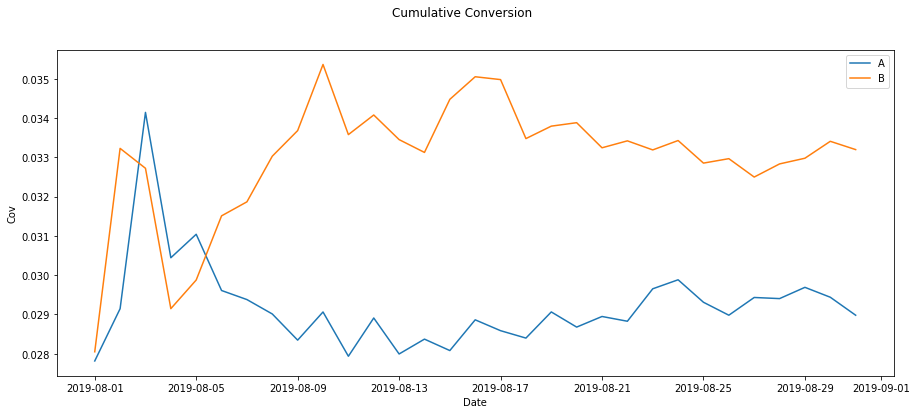

In [31]:
plt.plot(ordersA['date'], ordersA['cov'], label = 'A')
plt.plot(ordersB['date'], ordersB['cov'], label = 'B')
plt.legend()
plt.suptitle('Cumulative Conversion')
plt.ylabel('Cov')
plt.xlabel('Date')
plt.show()

We can see that, at the beginning group B had better conversion rate as a total than group A but later on ~19/8/17 there was a shift a group A took the lead and quit consistent one.

In this part I will calculate the number of orders per user.

In [32]:
ordersA['visits'] = visitsA['visits']

In [33]:
ordersA.reset_index()

index       date  revenue  transactionId  visitorId   cumrev  cumpur  \
0   0     2019-08-01  2356.8   24             20         2356.8   719      
1   1     2019-08-02  1503.5   20             19         3860.3   1338     
2   2     2019-08-03  1815.2   24             24         5675.5   1845     
3   3     2019-08-04  1146.6   16             15         6822.1   2562     
4   4     2019-08-05  1988.1   25             25         8810.2   3318     
5   5     2019-08-06  789.8    18             15         9600.0   3985     
6   6     2019-08-07  2242.9   18             18         11842.9  4629     
7   7     2019-08-08  1530.4   16             16         13373.3  5239     
8   8     2019-08-09  2947.1   16             14         16320.4  5856     
9   9     2019-08-10  3288.2   16             16         19608.6  6262     
10  10    2019-08-11  1229.7   13             13         20838.3  6980     
11  11    2019-08-12  3910.8   24             24         24749.1  7575     
12  12    2019-08-13  4096.9   14             14         28846.0  8323     
13  13    2019-08-14  1064.8   24             24         29910.8  9058     
14  14    2019-08-15  1408.2   15             15         31319.0  9686     
15  15    2019-08-16  1599.1   18             18         32918.1  10047    
16  16    2019-08-17  805.5    10             9          33723.6  10459    
17  17    2019-08-18  1171.8   17             17         34895.4  11127    
18  18    2019-08-19  2989.1   22             22         37884.5  11629    
19  19    2019-08-20  1232.3   12             12         39116.8  12204    
20  20    2019-08-21  2755.5   23             22         41872.3  12850    
21  21    2019-08-22  1783.3   16             16         43655.6  13459    
22  22    2019-08-23  1888.0   25             25         45543.6  13927    
23  23    2019-08-24  2002.7   15             15         47546.3  14322    
24  24    2019-08-25  1078.9   10             10         48625.2  14943    
25  25    2019-08-26  2464.8   16             16         51090.0  15665    
26  26    2019-08-27  4511.1   28             28         55601.1  16376    
27  27    2019-08-28  1602.6   17             17         57203.7  16970    
28  28    2019-08-29  4995.5   22             22         62199.2  17547    
29  29    2019-08-30  1364.3   11             10         63563.5  18037    
30  30    2019-08-31  991.4    12             12         64554.9  18736    

      cumavg       cov  visits  
0   3.277886  0.027816  719     
1   2.885127  0.029148  619     
2   3.076152  0.034146  507     
3   2.662802  0.030445  717     
4   2.655274  0.031043  756     
5   2.409034  0.029611  667     
6   2.558414  0.029380  644     
7   2.552644  0.029013  610     
8   2.786954  0.028347  617     
9   3.131364  0.029064  406     
10  2.985430  0.027937  718     
11  3.267208  0.028911  595     
12  3.465818  0.027995  748     
13  3.302142  0.028373  735     
14  3.233430  0.028082  628     
15  3.276411  0.028864  361     
16  3.224362  0.028588  412     
17  3.136101  0.028399  668     
18  3.257761  0.029065  502     
19  3.205244  0.028679  575     
20  3.258545  0.028949  646     
21  3.243599  0.028828  609     
22  3.270166  0.029655  468     
23  3.319809  0.029884  395     
24  3.254045  0.029311  621     
25  3.261411  0.028982  722     
26  3.395280  0.029433  711     
27  3.370872  0.029405  594     
28  3.544720  0.029692  577     
29  3.524062  0.029439  490     
30  3.445501  0.028982  699

In [34]:
print(ordersA.sort_values(by='visits', ascending=False).head(10))

         date  revenue  transactionId  visitorId   cumrev  cumpur    cumavg  \
4  2019-08-05  1988.1   25             25         8810.2   3318    2.655274   
12 2019-08-13  4096.9   14             14         28846.0  8323    3.465818   
13 2019-08-14  1064.8   24             24         29910.8  9058    3.302142   
25 2019-08-26  2464.8   16             16         51090.0  15665   3.261411   
0  2019-08-01  2356.8   24             20         2356.8   719     3.277886   
10 2019-08-11  1229.7   13             13         20838.3  6980    2.985430   
3  2019-08-04  1146.6   16             15         6822.1   2562    2.662802   
26 2019-08-27  4511.1   28             28         55601.1  16376   3.395280   
30 2019-08-31  991.4    12             12         64554.9  18736   3.445501   
17 2019-08-18  1171.8   17             17         34895.4  11127   3.136101   

         cov  visits  
4   0.031043  756     
12  0.027995  748     
13  0.028373  735     
25  0.028982  722     
0   0.027816  7

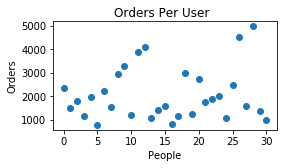

In [35]:
plt.rcParams["figure.figsize"] = (4, 2)
x_values = pd.Series(range(0,len(ordersA['revenue'])))
plt.scatter(x_values, ordersA['revenue']) 
plt.suptitle('Orders Per User')
plt.ylabel('Orders')
plt.xlabel('People')
plt.show()

I would say that most people bought around ~11 items in this group.

In [36]:
ordersB['visits'] = visitsB['visits']

In [37]:
ordersB.reset_index()

index       date  revenue  transactionId  visitorId   cumrev  cumpur  \
0   0     2019-08-01  1620.0   21             20         1620.0   713      
1   1     2019-08-02  2623.8   24             23         4243.8   1294     
2   2     2019-08-03  1806.8   16             16         6050.6   1803     
3   3     2019-08-04  1717.3   17             16         7767.9   2573     
4   4     2019-08-05  1495.0   23             23         9262.9   3280     
5   5     2019-08-06  3806.4   28             26         13069.3  3935     
6   6     2019-08-07  3531.5   24             24         16600.8  4644     
7   7     2019-08-08  3487.8   27             27         20088.6  5298     
8   8     2019-08-09  2558.1   25             24         22646.7  5908     
9   9     2019-08-10  1720.4   23             23         24367.1  6277     
10  10    2019-08-11  861.2    13             13         25228.3  6998     
11  11    2019-08-12  2245.7   23             22         27474.0  7541     
12  12    2019-08-13  1910.0   21             21         29384.0  8310     
13  13    2019-08-14  2711.7   23             22         32095.7  9056     
14  14    2019-08-15  5361.9   31             31         37457.6  9600     
15  15    2019-08-16  2697.7   20             20         40155.3  10013    
16  16    2019-08-17  1281.5   14             14         41436.8  10434    
17  17    2019-08-18  1044.9   9              9          42481.7  11171    
18  18    2019-08-19  22064.9  21             20         64546.6  11658    
19  19    2019-08-20  2324.6   20             20         66871.2  12218    
20  20    2019-08-21  2555.9   14             14         69427.1  12874    
21  21    2019-08-22  2560.8   25             24         71987.9  13524    
22  22    2019-08-23  1799.5   15             15         73787.4  14070    
23  23    2019-08-24  1527.2   16             16         75314.6  14448    
24  24    2019-08-25  1626.5   14             14         76941.1  15127    
25  25    2019-08-26  2900.4   25             24         79841.5  15803    
26  26    2019-08-27  2319.8   16             16         82161.3  16523    
27  27    2019-08-28  1558.0   28             27         83719.3  17177    
28  28    2019-08-29  3623.7   20             20         87343.0  17708    
29  29    2019-08-30  3393.3   24             24         90736.3  18198    
30  30    2019-08-31  2104.3   20             20         92840.6  18916    

      cumavg       cov  visits  
0   2.272090  0.028050  713     
1   3.279598  0.033230  581     
2   3.355851  0.032723  509     
3   3.019005  0.029149  770     
4   2.824055  0.029878  707     
5   3.321296  0.031512  655     
6   3.574677  0.031869  709     
7   3.791733  0.033031  654     
8   3.833226  0.033683  610     
9   3.881966  0.035367  369     
10  3.605073  0.033581  721     
11  3.643283  0.034080  543     
12  3.535981  0.033454  769     
13  3.544136  0.033127  746     
14  3.901833  0.034479  544     
15  4.010317  0.035054  413     
16  3.971325  0.034982  421     
17  3.802856  0.033480  737     
18  5.536679  0.033797  487     
19  5.473171  0.033884  560     
20  5.392815  0.033245  656     
21  5.322974  0.033422  650     
22  5.244307  0.033191  546     
23  5.212805  0.033430  378     
24  5.086342  0.032855  679     
25  5.052300  0.032968  676     
26  4.972541  0.032500  720     
27  4.873919  0.032835  654     
28  4.932403  0.032979  531     
29  4.986059  0.033410  490     
30  4.908046  0.033199  718

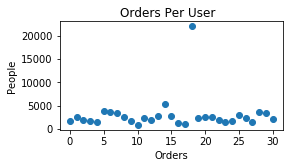

In [38]:
plt.rcParams["figure.figsize"] = (4, 2)
x_values = pd.Series(range(0,len(ordersB['revenue'])))
plt.scatter(x_values, ordersB['revenue']) 
plt.suptitle('Orders Per User')
plt.ylabel('People')
plt.xlabel('Orders')
plt.show()

In this group we can see that it is divided into 2 group of shoppers the first with 14 items a an average and the other with around ~16 items(outlier), more than group A as a whole.

In [39]:
np.percentile(ordersA['revenue'], [90, 99])

array([3910.8 , 4850.18])

In [40]:
np.percentile(ordersB['revenue'], [90, 99])

array([ 3623.7, 17054. ])

Group B have in the +90 percentage Group A does not show a huge leap forward in terms of items bought.

In [41]:
ordersB

date  revenue  transactionId  visitorId   cumrev  cumpur    cumavg  \
0  2019-08-01  1620.0   21             20         1620.0   713     2.272090   
1  2019-08-02  2623.8   24             23         4243.8   1294    3.279598   
2  2019-08-03  1806.8   16             16         6050.6   1803    3.355851   
3  2019-08-04  1717.3   17             16         7767.9   2573    3.019005   
4  2019-08-05  1495.0   23             23         9262.9   3280    2.824055   
5  2019-08-06  3806.4   28             26         13069.3  3935    3.321296   
6  2019-08-07  3531.5   24             24         16600.8  4644    3.574677   
7  2019-08-08  3487.8   27             27         20088.6  5298    3.791733   
8  2019-08-09  2558.1   25             24         22646.7  5908    3.833226   
9  2019-08-10  1720.4   23             23         24367.1  6277    3.881966   
10 2019-08-11  861.2    13             13         25228.3  6998    3.605073   
11 2019-08-12  2245.7   23             22         27474.0  7541    3.643283   
12 2019-08-13  1910.0   21             21         29384.0  8310    3.535981   
13 2019-08-14  2711.7   23             22         32095.7  9056    3.544136   
14 2019-08-15  5361.9   31             31         37457.6  9600    3.901833   
15 2019-08-16  2697.7   20             20         40155.3  10013   4.010317   
16 2019-08-17  1281.5   14             14         41436.8  10434   3.971325   
17 2019-08-18  1044.9   9              9          42481.7  11171   3.802856   
18 2019-08-19  22064.9  21             20         64546.6  11658   5.536679   
19 2019-08-20  2324.6   20             20         66871.2  12218   5.473171   
20 2019-08-21  2555.9   14             14         69427.1  12874   5.392815   
21 2019-08-22  2560.8   25             24         71987.9  13524   5.322974   
22 2019-08-23  1799.5   15             15         73787.4  14070   5.244307   
23 2019-08-24  1527.2   16             16         75314.6  14448   5.212805   
24 2019-08-25  1626.5   14             14         76941.1  15127   5.086342   
25 2019-08-26  2900.4   25             24         79841.5  15803   5.052300   
26 2019-08-27  2319.8   16             16         82161.3  16523   4.972541   
27 2019-08-28  1558.0   28             27         83719.3  17177   4.873919   
28 2019-08-29  3623.7   20             20         87343.0  17708   4.932403   
29 2019-08-30  3393.3   24             24         90736.3  18198   4.986059   
30 2019-08-31  2104.3   20             20         92840.6  18916   4.908046   

         cov  visits  
0   0.028050  713     
1   0.033230  581     
2   0.032723  509     
3   0.029149  770     
4   0.029878  707     
5   0.031512  655     
6   0.031869  709     
7   0.033031  654     
8   0.033683  610     
9   0.035367  369     
10  0.033581  721     
11  0.034080  543     
12  0.033454  769     
13  0.033127  746     
14  0.034479  544     
15  0.035054  413     
16  0.034982  421     
17  0.033480  737     
18  0.033797  487     
19  0.033884  560     
20  0.033245  656     
21  0.033422  650     
22  0.033191  546     
23  0.033430  378     
24  0.032855  679     
25  0.032968  676     
26  0.032500  720     
27  0.032835  654     
28  0.032979  531     
29  0.033410  490     
30  0.033199  718

In this part I will show the order prices.

In [42]:
ordersB['cost'] = ordersB['revenue'] / ordersB['transactionId']

In [43]:
ordersA['cost'] = ordersA['revenue'] / ordersA['transactionId']

In [44]:
ordersA.sort_values(by='revenue',ascending=False)
plt.rcParams["figure.figsize"] = (6, 4)
x_values = pd.Series(range(0,len(ordersA)))
plt.scatter(x_values, ordersA['cost']) 
plt.suptitle('Order Prices')
plt.ylabel('Price')
plt.xlabel('Number of Orders')
plt.show()

The majority of orders are at around 600 (probably dollars).

In [45]:
ordersB.sort_values(by='revenue',ascending=False)
plt.rcParams["figure.figsize"] = (6, 4)
x_values = pd.Series(range(0,len(ordersB)))
plt.scatter(x_values, ordersB['cost']) 
plt.suptitle('Order Prices')
plt.ylabel('Price')
plt.xlabel('Number of Orders')
plt.show()

Group B shows a whole different story, items in all kind of different prices are sold quit evenly at around 100 with an outline at 1000 dollars.

In [46]:
np.percentile(ordersA['cost'], [90, 99])

array([184.19375   , 272.96545455])

There isn't a visible anomaly point at this group as far as can see.

In [47]:
np.percentile(ordersB['cost'], [90, 99])

array([172.96451613, 790.26595238])

In group B at the 98 percentile there is a huge leap in the price.

In this part I will find the statistical significance of the different conversion between the groups.

In [48]:
sampleA = pd.concat([orders['visitorId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(orders['visitorId'])), name='orders')],axis=0)

In [49]:
sampleB = pd.concat([orders['visitorId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(orders['visitorId'])), name='orders')],axis=0)

H0: The statistical significance of the difference in conversion of group A and group B are the same.

H1: The statistical significance of the difference in conversion of group A and group B are differ.

In [51]:
"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'0.405'

There is no significant difference between the two (higher than 0.05)

In [52]:
"{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)

'-0.010'

Sample A which is group A is a bit lower (which is 'losing') compared to group B

H0: The statistical significance of the difference in average order size of group A and group B are the same.

H1: The statistical significance of the difference in average order size of group A and group B are differ.

In [53]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'0.346'

The average order dosent differ between the groups as it is higher than 0.05

In [54]:
'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)

'0.252'

The revenue of group B is higher than of group A

In [55]:
usersWithManyOrders = pd.concat([ordersA[ordersA['transactionId'] < 16]['visitorId'], ordersB[ordersB['transactionId'] < 16]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 200]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [56]:
sampleAFiltered = pd.concat([ordersA[np.logical_not(ordersA['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersA['transactionId'])),name='orders')],axis=0)

In [57]:
sampleBFiltered = pd.concat([ordersB[np.logical_not(ordersB['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersA['transactionId'])),name='orders')],axis=0)

H0: The statistical significance of the difference in conversion of group A and group B are the same.

H1: The statistical significance of the difference in conversion of group A and group B are differ.

In [58]:
"{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'0.191'

There is still no significant change in the groupes even after filtration.

In [59]:
"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.406'

Here we can see a big change from negative to positive in favor of group B

H0: The statistical significance of the difference in average order size of group A and group B are the same.

H1: The statistical significance of the difference in average order size of group A and group B are differ.

In [60]:
'{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

'0.266'

The p value didn't change by a lot.

In [61]:
'{0:.3f}'.format(orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(orders['group']=='A',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)

'0.022'

The difference changed dramatically and now there is a significant change.

In [62]:
ordersA_trials = visitsA['visits'].sum()
print('Trials:', ordersA_trials)
ordersA_successes = ordersA['visitorId'].sum()
print('Successes:', ordersA_successes)

Trials: 18736
Successes: 543


In [63]:
ordersB_trials = visitsB['visits'].sum()
print('Trials:', ordersB_trials)
ordersB_successes = ordersB['visitorId'].sum()
print('Successes:', ordersB_successes)

Trials: 18916
Successes: 628


Group A is the leader here because both have 31 Successes but group A had smaller number of trials the ratio is in their favor.

In [64]:
def check_hypothesis(successes1, trials1, successes2, trials2, alpha = .05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p2 - p1
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1 / trials1 + 1 / trials2))
    distr = stats.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p_value:', p_value)

In [65]:
check_hypothesis(ordersA_successes, ordersA_trials, ordersB_successes, ordersB_trials)

p_value: 0.01840751744395841


The 2 groups shown to be different and have statistical significance.

In [66]:
plt.hist(ordersA['cov'], alpha = .05, label = 'A', color = ("green"))
plt.hist(ordersB['cov'], alpha = .05, label = 'B', color = ("blue"))
plt.legend(loc = 'upper right')
plt.suptitle('Average Daily Conversion')
plt.ylabel('Conversion Rate')
plt.xlabel('Average')
plt.show()

We can see that group A is far more successful than group B with an immense spike at the average.

H0: The average conversion rate of group A and group B are the same.

H1: The average conversion rate of group A and group B are differ.

In [67]:
def testing_average(sample1, sample2, alpha = .05):
    sample1 = sample1.dropna()
    sample2 = sample2.dropna()
    stat1, p1_norm = stats.shapiro(sample1)
    stat2, p2_norm = stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm > alpha:
        statslev, p_levene = stats.levene(sample1, sample2)
        if p_levene < alpha:
            statist, p_value = stats.ttest_ind(sample1, sample2, equel_var = False)
        else:
            statist, p_value = stats.ttest_ind(sample1, sample2, equel_var = True)
    else:
        statist, p_value = stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value < alpha:
        print('Reject H0: The average conversion rate of group A and group B are differ.')
    else:
        print('Fail to reject H0: The average conversion rate of group A and group B are the same.')      

In [68]:
testing_average(ordersA['cov'], ordersB['cov'], alpha = .05)

3.308392197858232e-09
Reject H0: The average conversion rate of group A and group B are differ.


In [69]:
ordersA['avg_che'] = ordersA['revenue'] / visitsA['visits']
ordersB['avg_che'] = ordersB['revenue'] / visitsB['visits']

In [70]:
ordersA['avg_che'].mean()

3.568051532152876

In [71]:
ordersB['avg_che'].mean()

5.340773580268349

In [72]:
testing_average(ordersA['avg_che'], ordersB['avg_che'], alpha = .05)

0.08383948423730775
Fail to reject H0: The average conversion rate of group A and group B are the same.


# conclusion
Even thought there is a difference in conversion rate between the 2 groups, there isn't enough of a diffrance to say they are diffrant. With what I can see and say to stop the test for there isn't enough difference to reject the null hypothesis and by that money should be used in other A/B test.
## Additionally
There is a slight difference for what I can tell in those 2 groups that can be explained in the daily use of users in the macro level, and that might be with studying for better results and future understanding of human behavior.